In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
from copy import deepcopy
import random
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
#from orion.contrib.envs import load_env
#load_env()
import boto3
#from orion.sources import S3Source
aws_bucket = 'kilimanjaro-prod-datalake'
s3 = boto3.client('s3')

In [2]:
object_ = 'masters/uploads/transactions/1560426066385_Peak_transactions.csv'
transaction = s3.get_object(Bucket=aws_bucket, Key=object_)
transaction = pd.read_csv(transaction['Body'])

In [3]:
trans = deepcopy(transaction)
trans.head()

,salestransactionkey,salesordernumber,orderdate,ordertime,shippingdate,customerkey,shipcountry,postcode,itemnumber,pricetype,discountpercent,unitssold,grosssales,grossprofit
0,2139607,S0016-8920840,2015-08-30T00:00:00Z,1900-01-01T13:00:00Z,2015-08-30T00:00:00Z,220c0261086d7d2c254a9ba8d9339e6c15cb2792,United Kingdom,S61,90956,Clearance,0.0,1,58.16,15.9233
1,2842275,S0016-9272310,2016-03-10T00:00:00Z,1900-01-01T15:19:00Z,2016-03-10T00:00:00Z,375083e129410daa79593eb12317e1a3ead57f59,United Kingdom,ML2,87518,Clearance,0.0,1,63.94,10.9850
2,2821100,S0016-9263541,2016-03-03T00:00:00Z,1900-01-01T20:24:00Z,2016-03-03T00:00:00Z,8151f4728247ec548b4178b0d0685f70f45f3ec4,United Kingdom,S25,89813,Full Price,0.0,1,4.32,0.0000
3,3128532,S0016-9408798,2016-06-08T00:00:00Z,1900-01-01T23:10:00Z,2016-06-09T00:00:00Z,d42a941336443fc3070d9ef2a6c36982bffc1932,United Kingdom,EH6,100726,Full Price,0.0,1,33.61,14.0900
4,2874597,S0016-9288483,2016-03-22T00:00:00Z,1900-01-01T13:10:00Z,2016-03-22T00:00:00Z,f25eaaea0e1c9e713308d7a9ae2624589742e7d0,United Kingdom,PR4,95335,Clearance,0.0,1,56.76,12.4700


In [4]:
trans.dtypes

salestransactionkey      int64
salesordernumber        object
orderdate               object
ordertime               object
shippingdate            object
customerkey             object
shipcountry             object
postcode                object
itemnumber               int64
pricetype               object
discountpercent        float64
unitssold                int64
grosssales             float64
grossprofit            float64
dtype: object

In [5]:
## Convert dates
trans['orderdate'] = pd.to_datetime(trans['orderdate'], errors='coerce')
trans['orderdate'] = trans['orderdate'].dt.date
trans['orderdate'] = pd.to_datetime(trans['orderdate'], errors='coerce')

trans['ordertime'] = pd.to_datetime(trans['ordertime'], errors='coerce')
trans['ordertime'] = trans['ordertime'].dt.time

trans['shippingdate'] = pd.to_datetime(trans['shippingdate'], errors='coerce')
trans['shippingdate'] = trans['shippingdate'].dt.date
trans['orderdate'] = pd.to_datetime(trans['orderdate'], errors='coerce')

In [6]:
trans.head()

,salestransactionkey,salesordernumber,orderdate,ordertime,shippingdate,customerkey,shipcountry,postcode,itemnumber,pricetype,discountpercent,unitssold,grosssales,grossprofit
0,2139607,S0016-8920840,2015-08-30,13:00:00,2015-08-30,220c0261086d7d2c254a9ba8d9339e6c15cb2792,United Kingdom,S61,90956,Clearance,0.0,1,58.16,15.9233
1,2842275,S0016-9272310,2016-03-10,15:19:00,2016-03-10,375083e129410daa79593eb12317e1a3ead57f59,United Kingdom,ML2,87518,Clearance,0.0,1,63.94,10.9850
2,2821100,S0016-9263541,2016-03-03,20:24:00,2016-03-03,8151f4728247ec548b4178b0d0685f70f45f3ec4,United Kingdom,S25,89813,Full Price,0.0,1,4.32,0.0000
3,3128532,S0016-9408798,2016-06-08,23:10:00,2016-06-09,d42a941336443fc3070d9ef2a6c36982bffc1932,United Kingdom,EH6,100726,Full Price,0.0,1,33.61,14.0900
4,2874597,S0016-9288483,2016-03-22,13:10:00,2016-03-22,f25eaaea0e1c9e713308d7a9ae2624589742e7d0,United Kingdom,PR4,95335,Clearance,0.0,1,56.76,12.4700


In [7]:
# Duration
start = trans['orderdate'].min()
end = trans['orderdate'].max()
print("Start date:", start)
print("End date:", end)

if start.month > end.month:
    dur_year = end.year - start.year - 1
    dur_month = (12 - start.month) + end.month
    print ("Duration:", dur_year, "years", dur_month, "months")
else:
    dur_year = end.year - start.year
    dur_month = end.month - start.month
    print ("Duration:", dur_year, "years", dur_month, "months")

Start date: 2015-07-01 00:00:00
End date: 2019-06-06 00:00:00
Duration: 3 years 11 months


In [8]:
trans['year'] = trans['orderdate'].dt.year
trans['month'] = trans['orderdate'].dt.month
trans['dayofweek'] = trans['orderdate'].dt.day_name()

In [9]:
trans.head()

,salestransactionkey,salesordernumber,orderdate,ordertime,shippingdate,customerkey,shipcountry,postcode,itemnumber,pricetype,discountpercent,unitssold,grosssales,grossprofit,year,month,dayofweek
0,2139607,S0016-8920840,2015-08-30,13:00:00,2015-08-30,220c0261086d7d2c254a9ba8d9339e6c15cb2792,United Kingdom,S61,90956,Clearance,0.0,1,58.16,15.9233,2015,8,Sunday
1,2842275,S0016-9272310,2016-03-10,15:19:00,2016-03-10,375083e129410daa79593eb12317e1a3ead57f59,United Kingdom,ML2,87518,Clearance,0.0,1,63.94,10.9850,2016,3,Thursday
2,2821100,S0016-9263541,2016-03-03,20:24:00,2016-03-03,8151f4728247ec548b4178b0d0685f70f45f3ec4,United Kingdom,S25,89813,Full Price,0.0,1,4.32,0.0000,2016,3,Thursday
3,3128532,S0016-9408798,2016-06-08,23:10:00,2016-06-09,d42a941336443fc3070d9ef2a6c36982bffc1932,United Kingdom,EH6,100726,Full Price,0.0,1,33.61,14.0900,2016,6,Wednesday
4,2874597,S0016-9288483,2016-03-22,13:10:00,2016-03-22,f25eaaea0e1c9e713308d7a9ae2624589742e7d0,United Kingdom,PR4,95335,Clearance,0.0,1,56.76,12.4700,2016,3,Tuesday


In [10]:
## Keep S0 - sales order
trans['sales_type'] = trans['salesordernumber'].str[:2]
print(trans['sales_type'].value_counts())
print("Instances removed:", len(trans[(trans['sales_type'] !='S0')]))
test = trans[(trans['sales_type'] =='S0')]
test = deepcopy(test)

S0    9123789
SR     662553
HO      23090
10       8228
71       1895
       ...   
16         44
17         16
18          5
20          3
21          1
Name: sales_type, Length: 88, dtype: int64
Instances removed: 770046


In [11]:
## Remove negative values
print("Negative values:", len(test[(test['grosssales'] < 0)]))
test = test[(test['grosssales'] > 0)]

Negative values: 2964


In [12]:
test['gsales_perunit'] = test['grosssales'] / (test['unitssold'].abs())

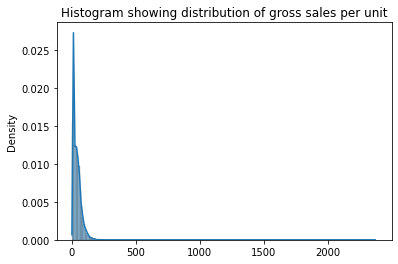

In [13]:
gsales_perunit = test['gsales_perunit'].values
ax = sns.histplot(gsales_perunit, stat="density", binwidth=10, kde=True)
plt.title('Histogram showing distribution of gross sales per unit')
plt.show()

In [14]:
## Exploring extreme values
test['gsales_perunit'] = test['grosssales'] / (test['unitssold'].abs())
print(test['postcode'][(test['gsales_perunit']> 300)].value_counts())
print("Extreme values:", len(test[(test['gsales_perunit']> 300)]))
test = test[(test.gsales_perunit < 300)]

0000    32
852     10
IP16     4
0085     3
NG19     3
        ..
AL7      1
EH28     1
W2       1
B19      1
KY7      1
Name: postcode, Length: 68, dtype: int64
Extreme values: 148


In [15]:
# To check bulk sales
orders2 = test.groupby(
   ['customerkey','orderdate', 'itemnumber']
).agg(
    {
         'unitssold': "sum",
    }
).round(decimals=2)
orders2= orders2.reset_index()

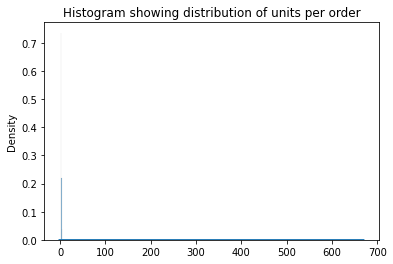

In [16]:
order_units = orders2['unitssold'].values
ax = sns.histplot(order_units, stat="density", binwidth=1, kde=True)
plt.title('Histogram showing distribution of units per order')
plt.show()

In [17]:
# Removing customers that have brought over 5 of the same item
bulk = orders2[(orders2['unitssold'] > 5)]
bulk_customers = list(bulk['customerkey'])
test = test[~test.customerkey.isin(bulk_customers)]

In [18]:
# The amount of bulk customers removed
print("Bulk customers removed:", len(bulk_customers))

Bulk customers removed: 19793


In [19]:
# Example customer
trans[(trans['customerkey'] == '000021af723428ee04a3a9232660d8808389c1d5')]

,salestransactionkey,salesordernumber,orderdate,ordertime,shippingdate,customerkey,shipcountry,postcode,itemnumber,pricetype,discountpercent,unitssold,grosssales,grossprofit,year,month,dayofweek,sales_type
3323621,31444762,S0016-11786535,2018-10-02,16:38:00,2018-10-02,000021af723428ee04a3a9232660d8808389c1d5,United Kingdom,E10,89813,Full Price,0.0,1,13.11,0.00,2018,10,Tuesday,S0
3368030,31424730,S0016-11783053,2018-10-01,00:42:00,2018-10-01,000021af723428ee04a3a9232660d8808389c1d5,United Kingdom,E8,89813,Full Price,0.0,1,10.19,0.00,2018,10,Monday,S0
3373403,31444760,S0016-11786535,2018-10-02,16:38:00,2018-10-02,000021af723428ee04a3a9232660d8808389c1d5,United Kingdom,E10,125966,Full Price,0.0,1,86.17,32.94,2018,10,Tuesday,S0
3403414,31444760,S0016-11786535,2018-10-02,16:38:00,2018-10-02,000021af723428ee04a3a9232660d8808389c1d5,United Kingdom,E10,125966,Full Price,0.0,1,88.49,32.94,2018,10,Tuesday,S0
3421368,31444762,S0016-11786535,2018-10-02,16:38:00,2018-10-02,000021af723428ee04a3a9232660d8808389c1d5,United Kingdom,E10,89813,Full Price,0.0,1,5.27,0.00,2018,10,Tuesday,S0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8269518,31492251,S0016-11793076,2018-10-05,09:32:00,2018-10-05,000021af723428ee04a3a9232660d8808389c1d5,United Kingdom,E10,89813,Full Price,0.0,1,8.83,0.00,2018,10,Friday,S0
8288128,31492250,S0016-11793076,2018-10-05,09:32:00,2018-10-05,000021af723428ee04a3a9232660d8808389c1d5,United Kingdom,E10,130196,Full Price,0.0,1,107.45,41.15,2018,10,Friday,S0
8301953,31492251,S0016-11793076,2018-10-05,09:32:00,2018-10-05,000021af723428ee04a3a9232660d8808389c1d5,United Kingdom,E10,89813,Full Price,0.0,1,8.93,0.00,2018,10,Friday,S0
8397005,31492251,S0016-11793076,2018-10-05,09:32:00,2018-10-05,000021af723428ee04a3a9232660d8808389c1d5,United Kingdom,E10,89813,Full Price,0.0,1,5.03,0.00,2018,10,Friday,S0


In [20]:
print("Initial dataset length:", len(trans))
print("After removal:", len(test))
print("Removed:",len(trans) - len(test))

Initial dataset length: 9893835
After removal: 8826696
Removed: 1067139


In [21]:
test.to_csv('transaction_tidy.csv')

In [33]:
prod_obj = 'masters/uploads/product/1560425499995_Peak_product.csv'
product = s3.get_object(Bucket=aws_bucket, Key=prod_obj)
product = pd.read_csv(product['Body'])

/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (0,11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [23]:
product.head()

,itemnumber,brandcode,category,colourvalue,divisioncode,fabric,itemcategorycode,itemcolour,itemfamilycode,itemquarter,itemseason,itemstylecode,productgroup
0,041333,PO,Mens,BLACK,FOOTWEAR,Unknown,FM,NaN,FA,Quarter 3,AW,41333,Vulcanised
1,083567,FEK,Mens,BLUE,APPAREL,Unknown,AM,Blue,WB,Quarter 2,SS,83566,T-shirts
2,033641,FM,Mens,WHITE,APPAREL,Unknown,AM,NaN,FA,Quarter 3,AW,33641,T-shirts
3,066348,L7,Womens,STD,APPAREL,Unknown,AW,NaN,DX,Quarter 3,AW,66348,Skirts
4,028949,C9,Mens,BLACK,APPAREL,Unknown,AM,NaN,FA,Quarter 2,SS,28949,T-shirts


In [24]:
product.dtypes

itemnumber          object
brandcode           object
category            object
colourvalue         object
divisioncode        object
fabric              object
itemcategorycode    object
itemcolour          object
itemfamilycode      object
itemquarter         object
itemseason          object
itemstylecode       object
productgroup        object
dtype: object

In [50]:
product[(product['itemnumber'] == 98724)]

,itemnumber,brandcode,category,colourvalue,divisioncode,fabric,itemcategorycode,itemcolour,itemfamilycode,itemquarter,itemseason,itemstylecode,productgroup
33246,98724.0,AA,Junior,WHITE,FOOTWEAR,Unknown,FJ,Iridescent White/Silver,FA,Quarter 2,SS,88087,Tennis


In [34]:
product['itemnumber'] = pd.to_numeric(product['itemnumber'], errors='coerce')

In [60]:
product.isnull().sum()

itemnumber              1
brandcode             522
category                0
colourvalue            48
divisioncode          532
fabric                 88
itemcategorycode      587
itemcolour          73404
itemfamilycode        554
itemquarter            88
itemseason             88
itemstylecode        1062
productgroup           10
dtype: int64

In [61]:
product.dtypes

itemnumber          float64
brandcode            object
category             object
colourvalue          object
divisioncode         object
fabric               object
itemcategorycode     object
itemcolour           object
itemfamilycode       object
itemquarter          object
itemseason           object
itemstylecode        object
productgroup         object
dtype: object

In [63]:
product.to_csv('product.csv')

In [62]:
test['itemnumber'] = pd.to_numeric(test['itemnumber'], errors='coerce')

In [36]:
# Merging with product
trans_prod = test.merge(product, how='left', on='itemnumber')
trans_prod.head()

,salestransactionkey,salesordernumber,orderdate,ordertime,shippingdate,customerkey,shipcountry,postcode,itemnumber,pricetype,...,colourvalue,divisioncode,fabric,itemcategorycode,itemcolour,itemfamilycode,itemquarter,itemseason,itemstylecode,productgroup
0,2139607,S0016-8920840,2015-08-30,13:00:00,2015-08-30,220c0261086d7d2c254a9ba8d9339e6c15cb2792,United Kingdom,S61,90956,Clearance,...,WHITE,FOOTWEAR,Unknown,FM,White,FA,Quarter 2,SS,90956,Nylon Running
1,2842275,S0016-9272310,2016-03-10,15:19:00,2016-03-10,375083e129410daa79593eb12317e1a3ead57f59,United Kingdom,ML2,87518,Clearance,...,BLACK,FOOTWEAR,Unknown,FM,Black,FA,Quarter 1,SS,87518.0,Leather Running
2,2821100,S0016-9263541,2016-03-03,20:24:00,2016-03-03,8151f4728247ec548b4178b0d0685f70f45f3ec4,United Kingdom,S25,89813,Full Price,...,STD,ACCESSORY,Unknown,CS,NaN,FA,Quarter 3,Terminal,NaN,Non-retail items
3,3128532,S0016-9408798,2016-06-08,23:10:00,2016-06-09,d42a941336443fc3070d9ef2a6c36982bffc1932,United Kingdom,EH6,100726,Full Price,...,BLACK,APPAREL,Unknown,AB,Black,FA,Quarter 4,AW,100726,Denim
4,2874597,S0016-9288483,2016-03-22,13:10:00,2016-03-22,f25eaaea0e1c9e713308d7a9ae2624589742e7d0,United Kingdom,PR4,95335,Clearance,...,BLACK,FOOTWEAR,Unknown,FW,Black/Cardboard,FA,Quarter 3,AW,95335,Basketball


In [38]:
trans_prod.iloc[:,19:-2].isnull().sum()

brandcode           1144443
category                  0
colourvalue               0
divisioncode              0
fabric                    0
itemcategorycode          0
itemcolour          2555335
itemfamilycode        24292
itemquarter               0
itemseason                0
dtype: int64

In [37]:
# Assess the sucess (the number of NAs)
print(len(trans_prod))
print("product NA's:", trans_prod.category.isnull().sum())

8826696
product NA's: 0


In [39]:
customers_obj = 'masters/uploads/customers/1560425511130_Peak_customers.csv'
customers = s3.get_object(Bucket=aws_bucket, Key=customers_obj)
customers = pd.read_csv(customers['Body'])

In [59]:
test = trans_prod_cust[(trans_prod_cust['customerkey'].str.contains("fb484d6a54da0d56910e2df0064c18c722801a66") )].head()
test[['itemnumber','unitssold']]

,itemnumber,unitssold
9506,98724,1
11591,92551,1
11911,101838,1
14489,104206,1
22126,100192,1


In [41]:
customers.head()

,customerkey,loyaltyaccount,gender
0,81aa7f6c66338e2545aa0bc64cbc071a8521a547,No,female
1,d97b8d31d188c5a5afce0303d3a678cb5fc20a09,No,male
2,ad515830171f289917a7a71788be477413ab6525,No,male
3,5b9946d7a58dbd5b802ac4948636cb1a76ec805c,Yes,female
4,686673547ff9d4ccb960d76a67305efd9c5f42ab,No,male


In [42]:
# Merging with customers
customers = customers.drop_duplicates()
trans_prod_cust = trans_prod.merge(customers, how='left', on='customerkey')
trans_prod_cust.tail()

,salestransactionkey,salesordernumber,orderdate,ordertime,shippingdate,customerkey,shipcountry,postcode,itemnumber,pricetype,...,fabric,itemcategorycode,itemcolour,itemfamilycode,itemquarter,itemseason,itemstylecode,productgroup,loyaltyaccount,gender
8826691,36342325,S0016-FA-21849238,2019-05-04,21:53:00,2019-05-04,fa48697fc1a6b561ad36aa3014100d8929c35e0b,United Kingdom,CV8,4021856,Full Price,...,Unknown,AM,GREY,FA,Quarter 2,SS,3821206.0,T-shirts,Yes,male
8826692,35197143,S0016-FA-21358182,2019-03-03,17:01:00,2019-03-04,3b37166617f1502a539f93efd3750f40de9503e0,United Kingdom,HR9,89813,Full Price,...,Unknown,CS,NaN,FA,Quarter 3,Terminal,NaN,Non-retail items,Yes,male
8826693,36346170,S0016-FA-21852565,2019-05-05,16:16:00,2019-05-05,619561d52eac243bf36c3a643dbf9f05fa877e7a,United Kingdom,CH8,117001,Full Price,...,Unknown,AM,Navy,FA,Quarter 1,SS,117001.0,Suits,Yes,female
8826694,36684400,S0016-FA-21955835,2019-05-24,08:48:00,2019-05-24,e772f79ef8338bef8eb1927a97c5520dc7cb3857,United Kingdom,WA2,89814,Full Price,...,Unknown,CS,NaN,FA,Quarter 3,AW,89814,Non-retail Items,Yes,male
8826695,36907383,S0016-FA-22019133,2019-06-01,17:58:00,2019-06-01,b40d445040ecb19e372100792ddfdb16e63329d3,United Kingdom,KA12,118803,Full Price,...,Unknown,AM,Black,FA,Quarter 3,AW,118803.0,Sport Shorts,Yes,male


In [43]:
trans_prod_cust[(trans_prod_cust['loyaltyaccount'].isnull())].head()

,salestransactionkey,salesordernumber,orderdate,ordertime,shippingdate,customerkey,shipcountry,postcode,itemnumber,pricetype,...,fabric,itemcategorycode,itemcolour,itemfamilycode,itemquarter,itemseason,itemstylecode,productgroup,loyaltyaccount,gender
9,2659296,S0016-9187462,2016-01-12,15:35:00,2016-01-12,ed65af6e7c068795eb1bd82dd27d7d248fadc76a,United Kingdom,LE16,96747,Clearance,...,Unknown,AM,Red,FA,Quarter 4,AW,96747,Light Jackets,NaN,NaN
11,2830135,S0016-9267535,2016-03-06,23:25:00,2016-03-07,8cfb71d7891259797d61ae4bd047a0ebb3186635,United Kingdom,PR4,100136,Clearance,...,Unknown,AM,Ecru/Navy,FA,Quarter 4,AW,100136,Knitwear,NaN,NaN
15,4400886,S0016-10043592,2017-03-23,15:54:00,2017-03-23,1f0620a64e8c4678a2a46c09ac300017bc1e3fee,United Kingdom,HP3,96972,Clearance,...,Unknown,FM,White/Navy/Gym Red,FA,Quarter 1,SS,96971,Leather Running,NaN,NaN
22,3326156,S0016-9503591,2016-08-02,04:58:00,2016-08-02,e21b315a41988e32d3ad6b452295822c98b75481,United Kingdom,W1G,89813,Full Price,...,Unknown,CS,NaN,FA,Quarter 3,Terminal,NaN,Non-retail items,NaN,NaN
23,2254303,S0016-8987958,2015-10-22,15:04:00,2015-10-22,29d39f6dc9750dbe0e93f8c3fc9ee5727ce4aa7f,Singapore,7308,95321,Full Price,...,Unknown,FJ,Cool Gry/Wht/Wolf Gry,FA,Quarter 4,AW,95321.0,Nylon Running,NaN,NaN


In [107]:
trans_prod_cust.to_csv('full_df.csv')

In [108]:
customers.isnull().sum()

customerkey            0
loyaltyaccount         0
gender            733232
dtype: int64

In [109]:
year = []
total_lines = []
product_NaN = []
customer_NaN = []
for i in (trans_prod_cust['year'].unique()):
    test = trans_prod_cust[(trans_prod_cust['year'] == i )]
    prod = len(test[test['category'].isnull()])
    cust = len(test[test['loyaltyaccount'].isnull()])
    year.append(i)
    total_lines.append(len(test))
    product_NaN.append(prod)
    customer_NaN.append(cust)
    
df = pd.DataFrame(list(zip(year,total_lines,product_NaN, customer_NaN)),
               columns =['Year', 'Total_records', 'Product_NaN', 'Customer_NaN'])
df

,Year,Total_records,Product_NaN,Customer_NaN
0,2015,686202,414897,145008
1,2016,1501805,925846,321407
2,2017,2280799,1380362,488282
3,2018,3205746,1863773,783423
4,2019,1152144,669883,309486


In [110]:
df['%_ProductNas'] = df.apply(lambda row: row.Product_NaN /
                                  row.Total_records, axis = 1)
df['%_CustomertNas'] = df.apply(lambda row: row.Customer_NaN /
                                  row.Total_records, axis = 1)

In [111]:
df[['Year','Total_records','Product_NaN', '%_ProductNas','Customer_NaN','%_CustomertNas']].round(2)

,Year,Total_records,Product_NaN,%_ProductNas,Customer_NaN,%_CustomertNas
0,2015,686202,414897,0.60,145008,0.21
1,2016,1501805,925846,0.62,321407,0.21
2,2017,2280799,1380362,0.61,488282,0.21
3,2018,3205746,1863773,0.58,783423,0.24
4,2019,1152144,669883,0.58,309486,0.27


In [112]:
prod_NAs = trans_prod_cust[trans_prod_cust['category'].isnull()]
print(len(prod_NAs))
prod_NAs.iloc[:,-2:].isnull().sum()

5254761


loyaltyaccount    1216675
gender            1347484
dtype: int64

In [113]:
cust_NAs = trans_prod_cust[trans_prod_cust['loyaltyaccount'].isnull()]
print(len(cust_NAs))
cust_NAs.iloc[:,19:-2].isnull().sum()

2047606


brandcode           1218431
category            1216675
colourvalue         1216675
divisioncode        1216675
fabric              1216675
itemcategorycode    1216675
itemcolour          1258335
itemfamilycode      1216675
itemquarter         1216675
itemseason          1216675
itemstylecode       1218431
productgroup        1216675
dtype: int64

In [114]:
orders = test.groupby(
   ['customerkey','orderdate']
).agg(
    {
         'itemnumber':lambda x: x.nunique(),  
         'unitssold': "sum",
         'grosssales': "sum",
         'gsales_perunit':"mean"
    }
).round(decimals=2)
orders= orders.reset_index()

In [115]:
orders = orders.sort_values("grosssales", ascending=False)
orders.head()

,customerkey,orderdate,itemnumber,unitssold,grosssales,gsales_perunit
169020,6220531aef54ed9bc054ba5e03a9f6f0cff8c034,2019-05-13,14,42,2231.39,53.13
237767,89e024de2de9f0058f75e515ea5622676612818d,2019-01-26,18,54,2133.22,39.50
357461,cf0734b59d69aa0d88743086dadfee4bb028b9aa,2019-04-16,10,30,2106.85,70.23
5804,035507b9f0bb1b9d2be033b0efe9006209688fea,2019-04-25,17,36,2097.76,58.27
337350,c35f36149900390ddc07c83a36a70666c1ac69da,2019-04-16,6,18,1978.60,109.92


In [116]:
orders.to_csv('orders.csv')

In [117]:
orders['grosssales'].max()

2231.39

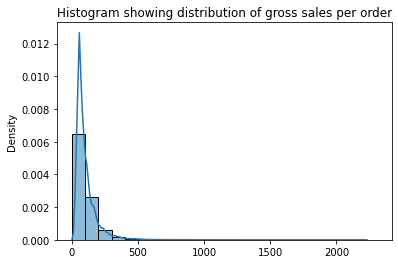

In [118]:
gross_sales = orders.grosssales.values
ax = sns.histplot(gross_sales, stat="density", binwidth=100, kde=True)
plt.title('Histogram showing distribution of gross sales per order')
plt.show()

In [119]:
freq = orders.groupby(
   ['customerkey']
).agg(
    {
         'orderdate':lambda x: x.nunique(),  
         'unitssold': "sum",
         'grosssales': "sum",
         'gsales_perunit':"mean"
    }
).round(decimals=2)
freq= freq.reset_index()
freq

,customerkey,orderdate,unitssold,grosssales,gsales_perunit
0,0000167ab10ff470d5b1c2116b9aa33ddccc12bd,2,3,112.01,36.04
1,0000698bd7377337985459c62c95070a27bf5bc9,1,8,287.77,35.97
2,0000701652f05b93c8f9269a6d491d69da58a43c,1,3,176.46,58.82
3,0000a804c45bb3ece53a155969e34813cfffdd6b,1,1,52.61,52.61
4,00015b41d1fd6171c16080cf3fe79bf7e8a6ea39,1,2,30.59,15.30
...,...,...,...,...,...
379578,fffee02817e1b41c74a8199efe05fce4821e61a7,1,4,100.83,25.21
379579,fffef64b060fb9df5d309e7026902495447e6922,1,1,104.74,104.74
379580,ffff04fa0971b2f8f3caeb4d851987f28f50e28d,1,2,60.59,30.30
379581,ffff740bd7ddeee6ed04f4ee80b28c728c3c38fe,1,2,35.04,17.52


In [120]:
freq = freq.sort_values("orderdate", ascending=False)
freq = freq.rename(columns={"orderdate": "orders"})
freq.head()

,customerkey,orders,unitssold,grosssales,gsales_perunit
339131,e4bc0a66f51936eaace9cb98e69476bafb6a66da,45,90,8170.16,92.95
225287,9808faaa1658780a360b1d4a1236098eb5d214fa,44,59,5787.89,100.17
368862,f8b3d96b96a58c516bc61a7de567b38a7824a869,41,73,3638.61,55.04
93036,3ebe433c81198a609bc5149c75475076bab5bdac,40,234,3687.13,18.02
333694,e1058b7fe340bb916284fad282e1befca134b295,35,85,2550.97,33.49


In [121]:
freq.to_csv('customer_orderfreq.csv')

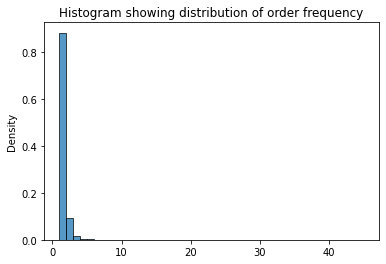

In [122]:
frequency = freq.orders.values
ax = sns.histplot(frequency, stat="density", binwidth=1)
plt.title('Histogram showing distribution of order frequency')
plt.show()

In [123]:
single_purchase = len(freq[(freq['orders'] == 1)])
multi_purchase = len(freq[(freq['orders'] != 1)])
print(single_purchase)
print(multi_purchase)
print(multi_purchase/ single_purchase)

334734
44849
0.13398399923521362


In [124]:
trans_prod_cust[(trans_prod_cust['customerkey'] == '6220531aef54ed9bc054ba5e03a9f6f0cff8c034' )].head()

,salestransactionkey,salesordernumber,orderdate,ordertime,shippingdate,customerkey,shipcountry,postcode,itemnumber,pricetype,...,fabric,itemcategorycode,itemcolour,itemfamilycode,itemquarter,itemseason,itemstylecode,productgroup,loyaltyaccount,gender
3958825,35932325,S0016-FA-21723610,2019-04-16,13:15:00,2019-04-16,6220531aef54ed9bc054ba5e03a9f6f0cff8c034,United Kingdom,TD9,89813,Full Price,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,female
4097520,35932324,S0016-FA-21723610,2019-04-16,13:15:00,2019-04-16,6220531aef54ed9bc054ba5e03a9f6f0cff8c034,United Kingdom,TD9,4022262,Clearance,...,Unknown,AM,Black,FA,Quarter 4,AW,3821467.0,Hoods,Yes,female
4107059,35932325,S0016-FA-21723610,2019-04-16,13:15:00,2019-04-16,6220531aef54ed9bc054ba5e03a9f6f0cff8c034,United Kingdom,TD9,89813,Full Price,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,female
4121777,35932324,S0016-FA-21723610,2019-04-16,13:15:00,2019-04-16,6220531aef54ed9bc054ba5e03a9f6f0cff8c034,United Kingdom,TD9,4022262,Clearance,...,Unknown,AM,Black,FA,Quarter 4,AW,3821467.0,Hoods,Yes,female
4131651,35932325,S0016-FA-21723610,2019-04-16,13:15:00,2019-04-16,6220531aef54ed9bc054ba5e03a9f6f0cff8c034,United Kingdom,TD9,89813,Full Price,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,female
